In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import os, sys

util_path = os.path.abspath(os.path.join(os.path.pardir, "utilities_and_data"))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

import plot_tools

plt.rc("font", size=12)

### Bayesian data analysis
##  Chapter 6, demo 2

Posterior predictive checking for binomial data - testing sequential dependence example based on BDA3 p. 147.

The idea is to calculate a test quantity on the actual data and compare it to the same test quantity calculated across simulated datasets from the posterior predictive distribution.

To check whether there is autocorrelation in a dataset which represents a sequence of binary outcomes we can count the number of times the data "switches" i.e. we go from a 0 to 1 or vice versa.

It happens 3 times in the observed data.

In [2]:
y = np.array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
Ty = np.count_nonzero(np.diff(y))
Ty

3

With a uniform prior and binomial likelihood the posterior is:

$$\theta \mid y \sim \text{Beta}(s + 1, n - s + 1)$$

where $s$ is the number of successes in $n$ trials.

In [3]:
n = len(y)
s = y.sum()

### Bayesian p-value (posterior predictive p-value)

The Bayesian p-value is defined as the probability that the replicated data could be more extreme that the observed data as measured by a test quantity.

We perform the following steps:

1. Draw `nsamp` samples from the posterior. We will thus have `nsamp` replicated datasets, one for each draw from the posterior.
2. Sample an array uniformly between 0 and 1 of shape `(n, nsamp)`.
3. By comparing the draws from the posterior to the uniformly sampled numbers, calculate how many values are below each draw from the posterior. This is the same as sampling from the posterior predictive. Each column of `yr` is now a simulated posterior predictive dataset of the same size as the original dataset.
4. Calculate the number of "switches" in the replicated datasets.
5. Plot the distribution of this compared to the observed number.
6. Calculate how often the replicated data produces a value more extreme than the observed data.

In [4]:
np.random.seed(42)
nsamp = 10_000
posterior_draws = np.random.beta(s + 1, n - s + 1, size=nsamp)
y_replicates = np.random.rand(n, nsamp) < posterior_draws
# y_replicates = np.random.binomial(1, t, size=(n, nsamp)) # could also do this
Tyr = (np.diff(y_replicates, axis=0) != 0).sum(axis=0)
bayesian_p = np.mean(Tyr <= Ty)

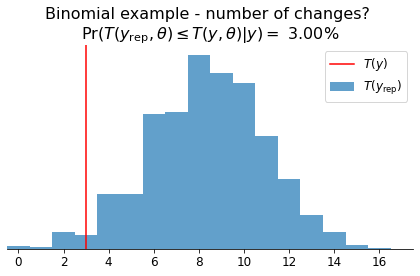

In [5]:
plt.hist(
    Tyr,
    np.arange(19),
    align="left",
    label="$T(y_\mathrm{rep})$",
    color=plot_tools.lighten("C0", 0.3),
)
plt.axvline(Ty, color="red", label="$T(y)$")
plt.xlim((-0.5, 17.5))
plt.title(
    "Binomial example - number of changes? \n"
    r"$\operatorname{Pr}(T(y_\mathrm{rep},\theta) \leq T(y,\theta)|y) = $"
    + f" {100*bayesian_p:.2f}%",
    fontsize=16,
)
plt.legend()
plot_tools.modify_axes.only_x(plt.gca())
plt.tight_layout()